In [23]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import scipy
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os

In [24]:
if not os.path.exists('constituents-financials.csv'):
    urllib.request.urlretrieve("https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.csv", "constituents-financials.csv")


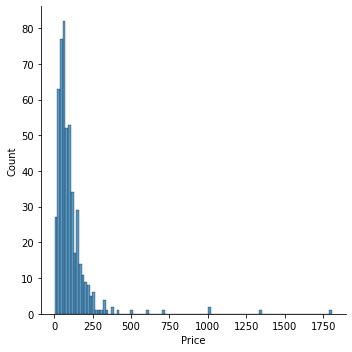

In [25]:
data = pd.read_csv('constituents-financials.csv')
sns.displot(data.Price, kde=False)


g:\Programming\itmo_algorithms\itmo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


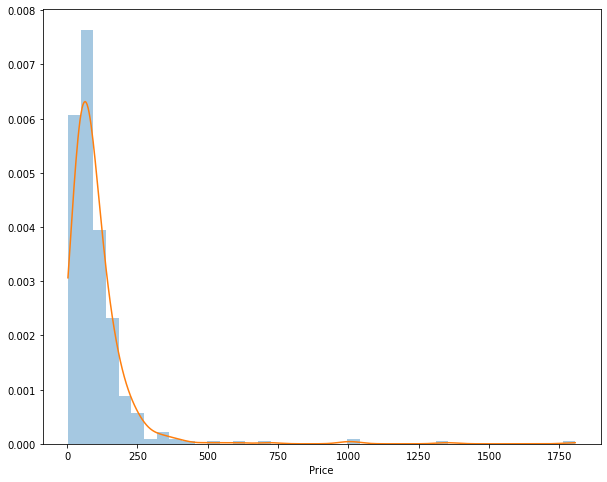

In [26]:
plt.figure(figsize=(10, 8))

kernel = st.gaussian_kde(data.Price)
print(kernel)
min_amount, max_amount = data.Price.min(), data.Price.max()
x = np.linspace(min_amount, max_amount, len(data.Price))
kde_values = kernel(x)

sns.distplot(data.Price, kde=False, bins=40, norm_hist=True, label=f'Average price in dollars')
plt.plot(x, kde_values)

iqr 70.29
1/4 quantile 46.25 3/4 quantile 116.54
min -59.185 max 151.685
median 73.92


<AxesSubplot:>

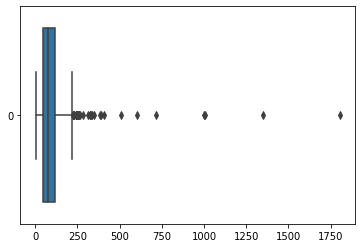

In [27]:
price = data.Price
# price = price[price.between(price.min(), price.quantile(.99))].reset_index(drop=True)

q1 = price.quantile(0.25)
q3 = price.quantile(0.75)
iqr =  q3 -  q1
print('iqr', iqr)
print('1/4 quantile', price.quantile(1/4), '3/4 quantile', price.quantile(3/4))
print('min', q1-1.5*iqr, 'max', q1+1.5*iqr)
print('median', price.median())
sns.boxplot(data=price, orient='h')

(0.7564047240073324, -1.6683261653102743, 76.34224847520608)


g:\Programming\itmo_algorithms\itmo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


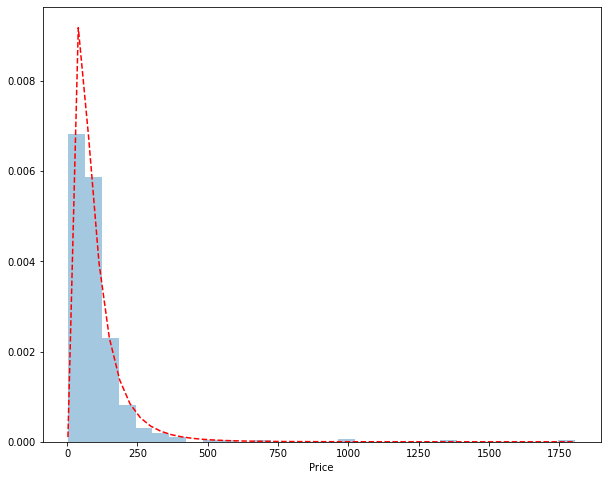

In [30]:
plt.figure(figsize=(10, 8))
x = np.linspace(np.min(price), np.max(price))
params = scipy.stats.lognorm.fit(price)
print(params)
sns.distplot(price, kde=False, bins=30, norm_hist=True, label=f'Average price in dollars')
pdf = scipy.stats.lognorm.pdf(x, *params)
plt.plot(x, pdf, 'r--')
plt.show()

g:\Programming\itmo_algorithms\itmo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


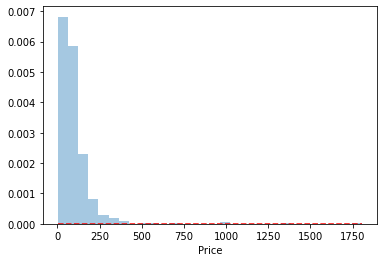

In [85]:
def loss_function(est_params, freq, x_theo):
    mu, sigma = est_params
    res = 0
    for i in range(len(freq)):
        exp = np.exp(-(np.log(x_theo[i]) - mu)**2 / (2 * sigma ** 2))
        frac = 1 / (x_theo[i] * sigma * 2 * (np.pi ** 0.5))
        res += (freq[i] - frac * exp)
        
    return res


quantiles = [price.quantile(q) for q in np.linspace(0, 1, 10)]
hist = np.histogram(price, bins=30)
freq = hist[0]
positions = [(hist[1][i] + hist[1][i+1])/2 for i in range(len(hist[1]) - 1)]

res_lsq = scipy.optimize.least_squares(loss_function, [2, 3], args=(freq, positions))
mu, sigma = res_lsq.x
x = np.linspace(np.min(price), np.max(price))
pdf = scipy.stats.lognorm.pdf(x, sigma, mu)
sns.distplot(price, kde=False, bins=30, norm_hist=True, label=f'Average price in dollars')

plt.plot(x, pdf, 'r--')

In [86]:

ks = scipy.stats.kstest(price, 'lognorm', params, N=100)
chi2 = scipy.stats.chisquare(price)
print(ks)
print(chi2)

KstestResult(statistic=0.034541777326868695, pvalue=0.5711796838510748)
Power_divergenceResult(statistic=87716.67382986039, pvalue=0.0)


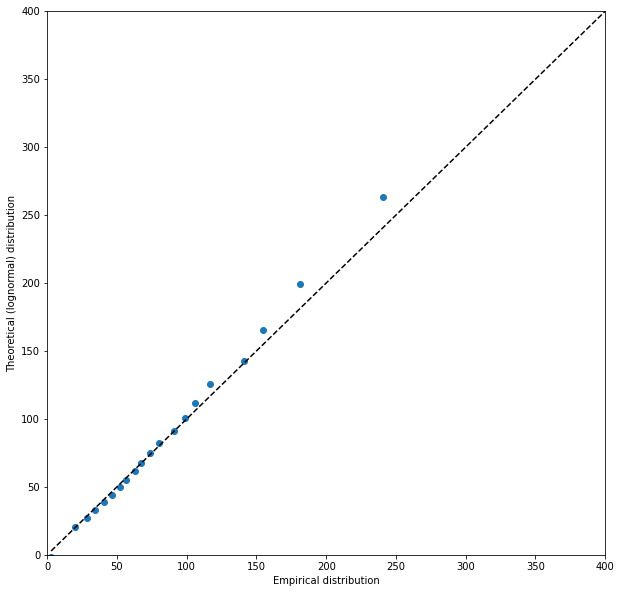

In [84]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution

# Calculation of quantiles
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(price, percs)
qn_lognorm = scipy.stats.lognorm.ppf(percs / 100.0, *params)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_lognorm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (lognormal) distribution')

plt.show()